# Analyze bookstore sales with Python

## <i>Sales indicator analysis</i>

My mission here for Lapage is to analyse the strengths, weaknesses and customer behavior of Lapage.

I was also asked to analyze the relationship between a customer's gender and the categories of books purchased, and then the link between the customers'age and the total amount of purchases, the purchase frequency, the average basket size and the categories of books purchased.
 <br></br>
 
<u> Summary</u> :

 Tools
 

II. Sales indicators analysis
    <br>1. Total sales
    <br>-- a. Total sales by product category
    <br>-- b. Total sales by age group
    <br>-- c. Overall trend over time and total sales evolution
    <br>*2. Customer profile and sales top/flop
    <br>-- a. Customer profile
    <br>-- b. Top/flop of number of sales

 Conclusion (part 2) 

<a id='another_cell_0'></a>

### Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

In [2]:
lapage_df = pd.read_csv('export_lapage_df.csv', sep=';')#lapage database importation
lapage_df['date'] = pd.to_datetime(lapage_df['date'])#date convertion

## II. Sales indicators analysis

### 1. Total sales

<a id='another_cell_e'></a>

#### a. Total sales by category

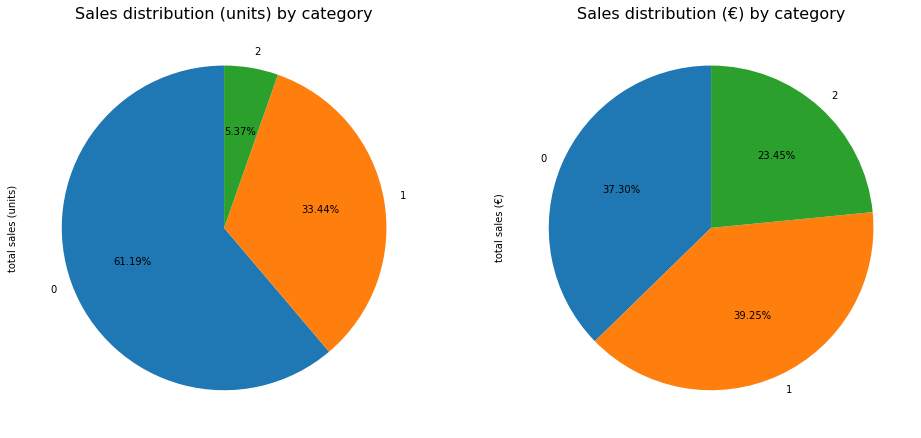

In [3]:
#total sales by category
lapage_categ = lapage_df.groupby(["categ"]).agg({"price":"sum", "id_prod":"count"})
lapage_categ.rename(columns={"id_prod":"total sales (units)", "price":"total sales (€)"}, inplace=True)

plt.figure( figsize=(16,10) )

plt.subplot(121)
plt.title("Sales distribution (units) by category", fontsize=16)
lapage_categ["total sales (units)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.subplot(122)
plt.title("Sales distribution (€) by category", fontsize=16)
lapage_categ["total sales (€)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.savefig("Part2.Sales distribution by category.png", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><br><li> <b>Category 0</b> : with 61% of products sold and 37% of sales, this category of products seems cheap and very popular with customers</br></li>
    <i><li> <b>Category 1</b> : with 33% of products sold and 39% of sales, this category of products is in the middle of prices and sales</li>
    <i><li> <b>Category 2</b> : with 5% of products sold and 23% of sales, this category of products seems to be the most expensive</li>
</i></div>

<a id='another_cell_f'></a>

#### b. Total sales by age group

In [4]:
#age groups attribution
lapage_df["age_groups"] = pd.cut(lapage_df["age"], bins=[15,25,35,45,55,65,75,100], labels = ["18 - 25 ans","26 - 35 ans","36 - 45 ans","46 - 55 ans","56 - 65 ans","66 - 75 ans","76 ans - plus"])
display(lapage_df.head())

,Unnamed: 0,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ,age_groups
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,36,4.18,0,36 - 45 ans
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,34,15.99,1,26 - 35 ans
2,2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022-06,f,1968,54,7.99,0,46 - 55 ans
3,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,22,69.99,2,18 - 25 ans
4,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,42,4.99,0,36 - 45 ans


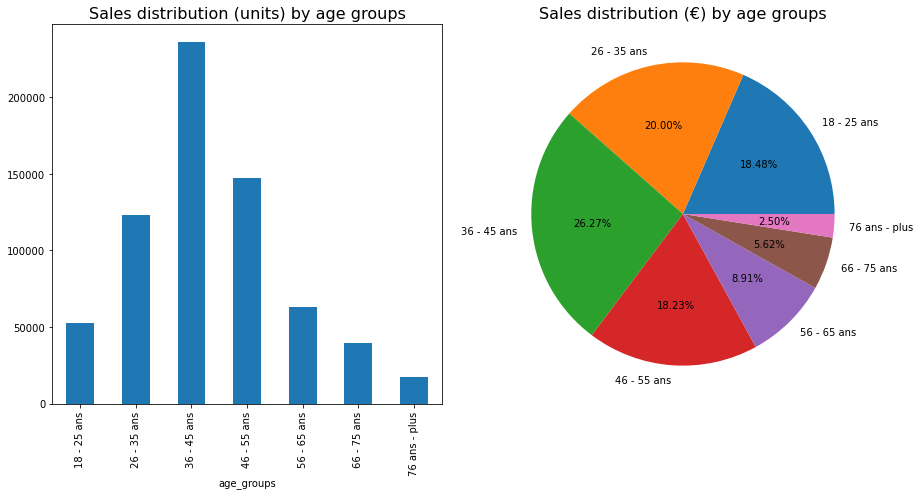

In [5]:
#group by age groups
lapage_age = lapage_df.groupby(["age_groups"]).agg({"price":"sum", "id_prod":"count"})
lapage_age.rename(columns={"id_prod":"total sales (units)", "price":"total sales (€)"}, inplace=True)

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("Sales distribution (units) by age groups", fontsize=16)
lapage_age["total sales (units)"].plot(kind="bar")

plt.subplot(122)
plt.title("Sales distribution (€) by age groups", fontsize=16)
lapage_age["total sales (€)"].plot(kind="pie", autopct='%1.2f%%')
plt.ylabel("")

plt.savefig("Part2.Sales distribution by age groups.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><br><li> The 36-45 age group is the one that buy the most products online and the one that has the largest percentage of purchases during the two last years</br></li>
</i></div>

- Total sales by age groups and by category

------------------------------------------------------------------------------------------------------------------------
Catégorie 0


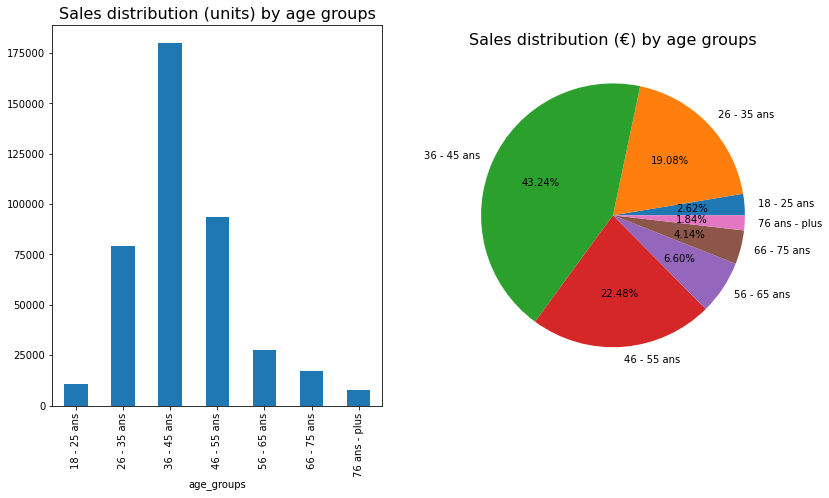

------------------------------------------------------------------------------------------------------------------------
Catégorie 1


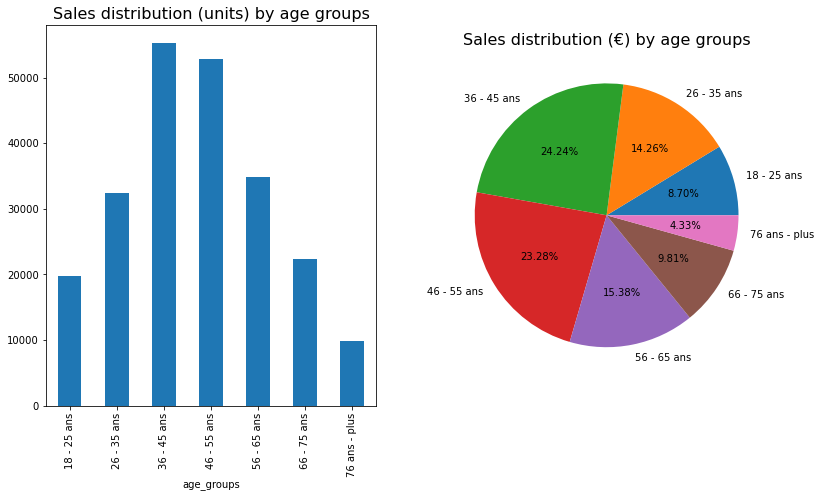

------------------------------------------------------------------------------------------------------------------------
Catégorie 2


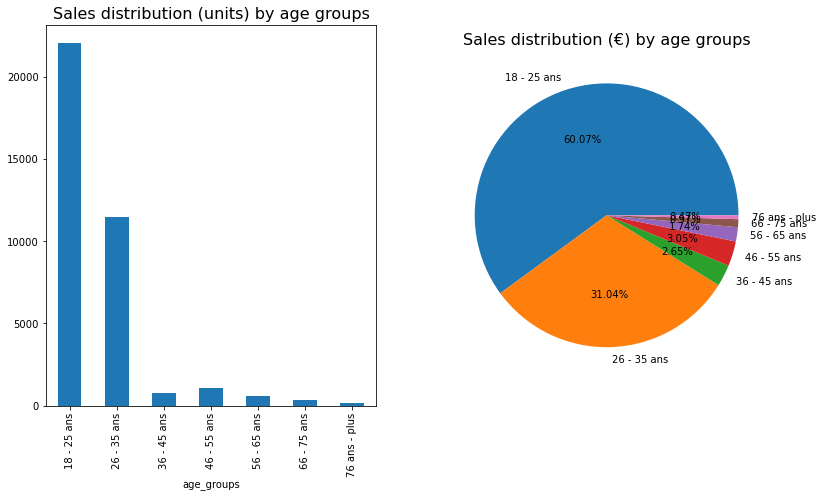

In [6]:
#group by age group and by category
lapage_age_cat = lapage_df.groupby(['categ', 'age_groups']).agg({"price":"sum", "id_prod":"count"})
lapage_age_cat.rename(columns={"id_prod":"total sales (units)", "price":"total sales (€)"}, inplace=True)

for cat in lapage_df["categ"].unique():
    subset = lapage_df[lapage_df.categ == cat]
    s1 = subset.groupby(["age_groups"]).agg({"price":"sum", "id_prod":"count"})
    s1.rename(columns={"id_prod":"total sales (units)", "price":"total sales (€)"}, inplace=True)
    
    print("-"*120)
    print("Catégorie", cat)
    plt.figure( figsize=(13,7) )

    plt.subplot(121)
    plt.title("Sales distribution (units) by age groups", fontsize=16)
    s1["total sales (units)"].plot(kind="bar")

    plt.subplot(122)
    plt.title("Sales distribution (€) by age groups", fontsize=16)
    s1["total sales (€)"].plot(kind="pie",  autopct='%1.2f%%')
    plt.ylabel("")

    plt.xticks(rotation = "vertical")
    plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><br><li> <b>Category 0</b> : most of clients have more than 30 years-old in this "cheap products" category with 43% of sales for the 36-45 age group</br></li>
    <i><li> <b>Category 1</b> : this category in the middle of prices and sales seems to interest proportionally all age groups, but in units mostly the 36-55</li>
    <i><li> <b>Category 2</b> : most of clients have less than 25 years-old in this "expensive products" category with 60% of sales for the 18-25 age group</li>
</i></div>

<a id='another_cell_g'></a>

#### c. Overall trend over time and total sales evolution

In [7]:
sales_day = lapage_df.groupby(lapage_df['date'].dt.date).sum()['price']

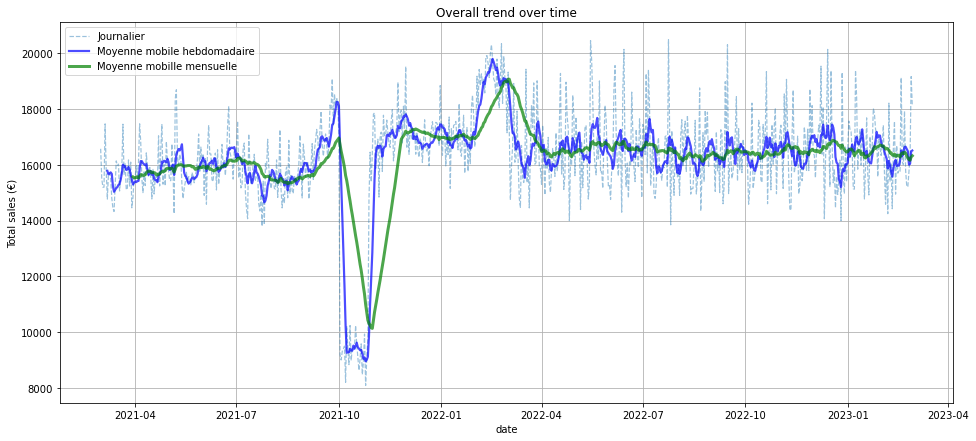

In [8]:
#overall trend over time
sales_day = lapage_df.groupby(lapage_df['date'].dt.date).sum()['price']
sales_week = sales_day.rolling(7).mean()
sales_month = sales_day.rolling(30).mean()

plt.figure(figsize=(16,7))
sales_day.plot(label="Journalier", lw=1.2, style='--', alpha=0.45, ms=4)
sales_week.plot(label="Moyenne mobile hebdomadaire", lw=2.2, color='b', alpha=0.7)
sales_month.plot(label="Moyenne mobille mensuelle", lw=3, color='g', alpha=0.7)

plt.legend()
plt.grid()
plt.ylabel("Total sales (€)")
plt.title("Overall trend over time");
plt.savefig("Part2.Overall trend over time.png", bbox_inches='tight')

<div class="alert-success">
    <u>Notice</u> :
    <i><br><li> Online sales reached a peak of over 20 000 € per day in February 2022</br></li>
</i></div>

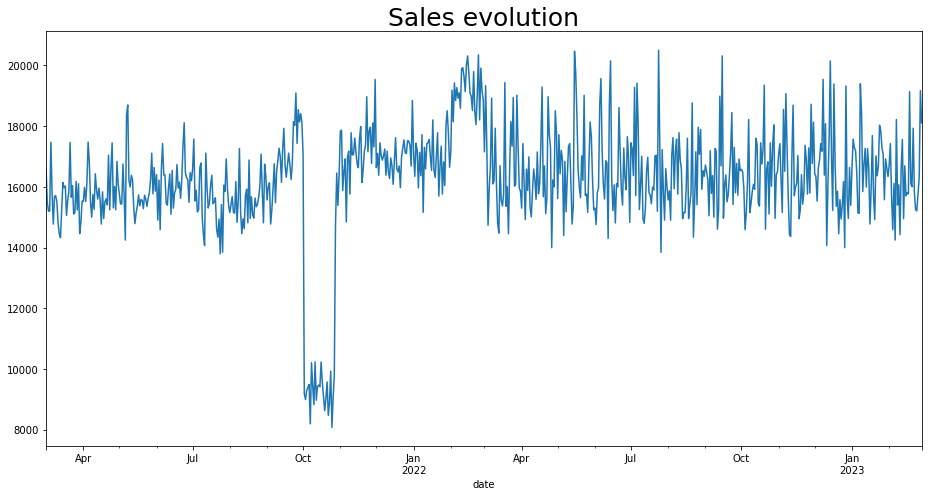

In [9]:
#sales evolution
lapage_per = lapage_df.groupby(['date']).agg({"price":"sum", "id_prod":"count"})
lapage_per.rename(columns={"id_prod":"total sales (units)", "price":"total sales (€)"}, inplace=True)

plt.figure(figsize=(13,7))

plt.title("Sales evolution", fontsize=25)
lapage_per["total sales (€)"].plot(kind="line")

plt.tight_layout()
plt.show()

<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> There is a significant drop in sales on October 2021 to analyse</br></li>
<li> We study the sales evolution of October 2021 by category to understand the problem here</li>
</i></div>

- Total sales by age by period, date and category in October 2021 :

--------------------------------------------------
Catégorie 0


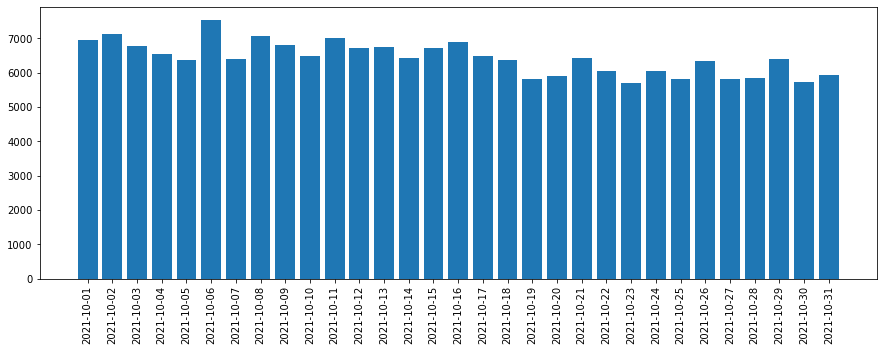

--------------------------------------------------
Catégorie 1


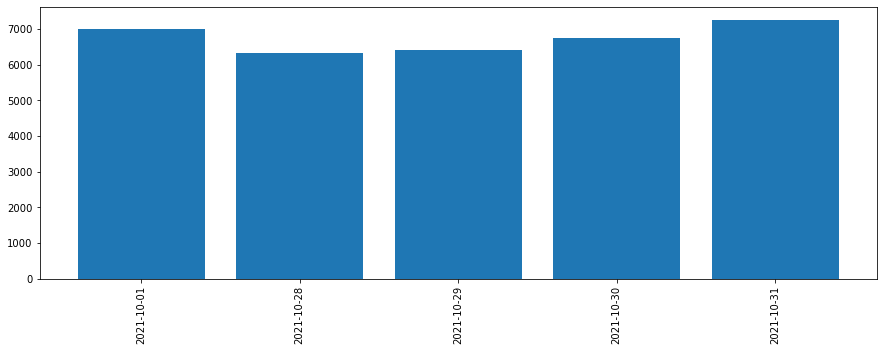

--------------------------------------------------
Catégorie 2


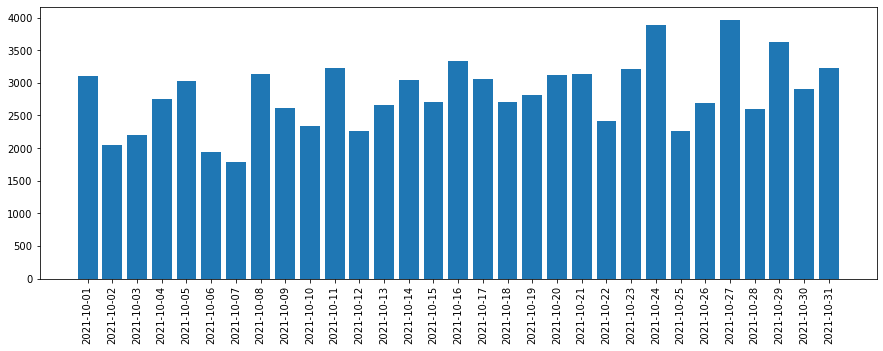

In [10]:
lapage_oct_21 = lapage_df.loc[lapage_df["period"]=='2021-10'].copy()#october 2021 dataframe

#group by period, date and category (Oct 21)
lapage_oct_21_cat = lapage_oct_21.groupby(["period","date","categ"]).agg({"price":"sum","id_prod":"count"})
lapage_oct_21_cat.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_oct_21_cat.to_csv("lapage_oct_21_cat.csv", sep=";")
lapage_oct_21_cat = pd.read_csv('lapage_oct_21_cat.csv', sep=';')

for cat in lapage_oct_21_cat["categ"].unique():
    subset = lapage_oct_21_cat[lapage_oct_21_cat.categ == cat]
    print("-"*50)
    print("Catégorie", cat)
    plt.figure(figsize=(15,5))
    plt.bar(subset["date"], subset["total sales (€)"])
    plt.xticks(rotation = "vertical")
    plt.show()

<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> No sales recorded from October 02 to 27, 2021 on category 1</br></li>
<li> In order to not have a biased averages, it is better to delete the month of October 2021 in the database</li>
</i></div>

- Deletion of the month of October 2021 in the database :

In [11]:
lapage_df.shape

(679332, 14)

In [12]:
indexNames = lapage_df[lapage_df['period'] == '2021-10' ].index#get names of indexes for each period who has value "2021-10"
lapage_df.drop(indexNames , inplace=True)#delete these row indexes from the database
lapage_df.shape

(657726, 14)

- Total sales distribution by period and category of products :

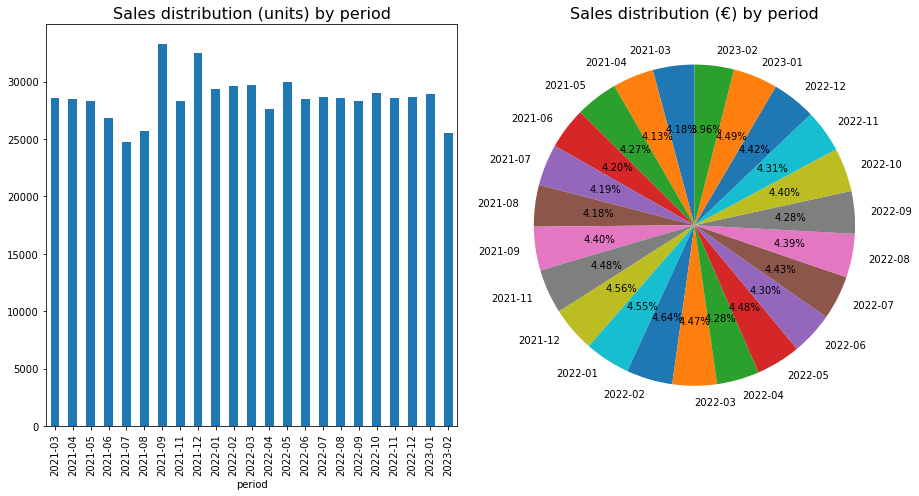

In [13]:
#total sales distribution group by period
lapage_df_period = lapage_df.groupby(["period"]).agg({"price":"sum", "id_prod":"count"})
lapage_df_period.rename(columns={"id_prod":"total sales (units)", "price":"total sales (€)"}, inplace=True)

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("Sales distribution (units) by period", fontsize=16)
lapage_df_period["total sales (units)"].plot(kind="bar")

plt.subplot(122)
plt.title("Sales distribution (€) by period", fontsize=16)
lapage_df_period["total sales (€)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)
plt.ylabel("")

plt.tight_layout()
plt.savefig("Part2.Sales distribution by period.png", bbox_inches='tight')
plt.show()

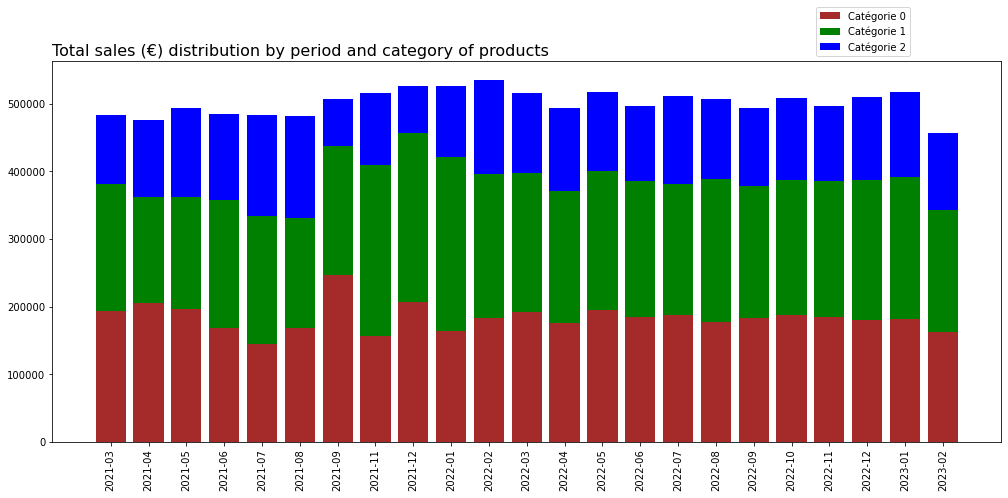

---------------------------------------------------------------------------------------------------- 



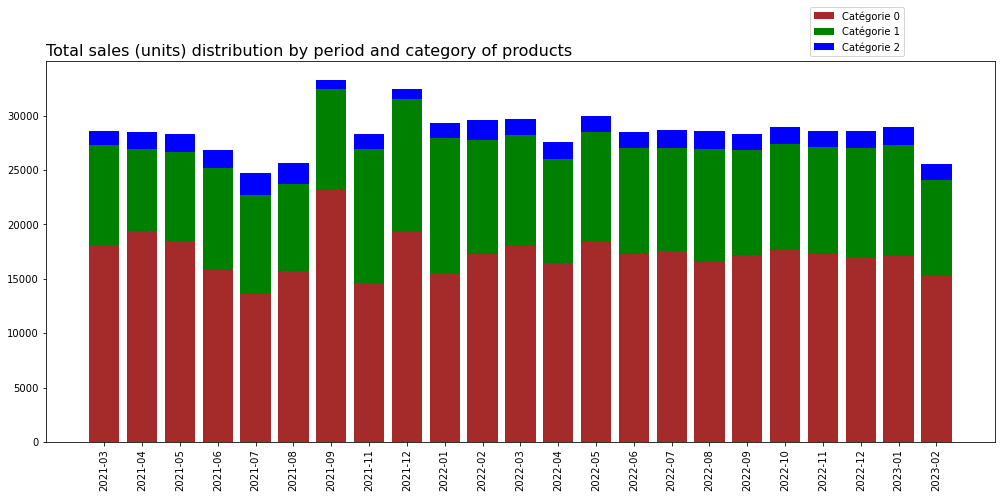

In [14]:
#total sales distribution by period and category of products
lapage_cat_0 = lapage_df.loc[lapage_df["categ"]==0].copy()#category 0 dataframe
lapage_cat_1 = lapage_df.loc[lapage_df["categ"]==1].copy()#category 1 dataframe
lapage_cat_2 = lapage_df.loc[lapage_df["categ"]==2].copy()#category 2 dataframe

#group by period for category 0
lapage_cat_0_total = lapage_cat_0.groupby(["period"]).agg({"price":"sum","id_prod":"count"})
lapage_cat_0_total.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_cat_0_total.to_csv("lapage_cat_0_total.csv", sep=";")
lapage_cat_0_total = pd.read_csv('lapage_cat_0_total.csv', sep=';')

#group by period for category 1
lapage_cat_1_total = lapage_cat_1.groupby(["period"]).agg({"price":"sum","id_prod":"count"})
lapage_cat_1_total.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_cat_1_total.to_csv("lapage_cat_1_total.csv", sep=";")
lapage_cat_1_total = pd.read_csv('lapage_cat_1_total.csv', sep=';')

#group by period for category 2
lapage_cat_2_total = lapage_cat_2.groupby(["period"]).agg({"price":"sum","id_prod":"count"})
lapage_cat_2_total.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_cat_2_total.to_csv("lapage_cat_2_total.csv", sep=";")
lapage_cat_2_total = pd.read_csv('lapage_cat_2_total.csv', sep=';')

plt.figure(figsize=(17,7))
plt.bar(lapage_cat_0_total["period"],lapage_cat_0_total["total sales (€)"],color="brown",label="Catégorie 0")
plt.bar(lapage_cat_1_total["period"],lapage_cat_1_total["total sales (€)"],color="green",bottom=np.array(lapage_cat_0_total["total sales (€)"]),label="Catégorie 1")
plt.bar(lapage_cat_2_total["period"],lapage_cat_2_total["total sales (€)"],color="blue",bottom=np.array(lapage_cat_0_total["total sales (€)"])+np.array(lapage_cat_1_total["total sales (€)"]),label="Catégorie 2")
plt.title("Total sales (€) distribution by period and category of products", fontsize=16, loc="left")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.xticks(rotation = "vertical")
plt.savefig("Part2.Total sales (€) distribution by period and category of products.png", bbox_inches='tight')
plt.show()

print('-'*100, "\n")

plt.figure(figsize=(17,7))
plt.bar(lapage_cat_0_total["period"],lapage_cat_0_total["total sales (units)"],color="brown",label="Catégorie 0")
plt.bar(lapage_cat_1_total["period"],lapage_cat_1_total["total sales (units)"],color="green",bottom=np.array(lapage_cat_0_total["total sales (units)"]),label="Catégorie 1")
plt.bar(lapage_cat_2_total["period"],lapage_cat_2_total["total sales (units)"],color="blue",bottom=np.array(lapage_cat_0_total["total sales (units)"])+np.array(lapage_cat_1_total["total sales (units)"]),label="Catégorie 2")
plt.title("Total sales (units) distribution by period and category of products", fontsize=16, loc="left")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.xticks(rotation = "vertical")
plt.savefig("Part2.Total sales (units) distribution by period and category of products.png", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
<i><li> The total sales evolution is rather stable over time for each category of products, with a month of September 2021 in high proportion of units sales on the cheapest categories 0 and 1 but in low proportion on the most expensive category number 2</li>
</i></div>

### 2. Customer profile and sales top/flop

<a id='another_cell_h'></a>

#### a. Customer profile

- Outliers customers :

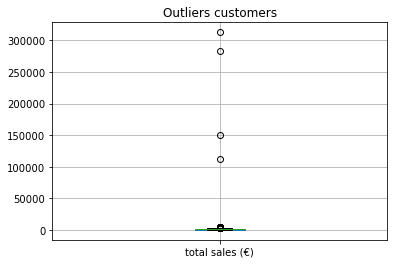

,total sales (€),purchase frequency
client_id,,
c_1609,312755.08,24472
c_4958,282654.61,5090
c_6714,149847.59,8903
c_3454,111798.63,6635
c_2899,5214.05,105
...,...,...
c_2793,12.99,1
c_4648,11.20,1
c_240,11.06,1


In [15]:
#customer profile
profile = lapage_df.groupby(["client_id"]).agg({"price":"sum", "id_prod":"count"})
profile.rename(columns={"price":"total sales (€)", "id_prod":"purchase frequency"}, inplace=True)

#outliers customer checkin
profile.boxplot(column=["total sales (€)"]) 
plt.title("Outliers customers")
plt.savefig("Part2.Outliers customers.png", bbox_inches='tight')
plt.show()
profile.sort_values(by=["total sales (€)"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><li> The clients c_1609 , c_4958, c_6714 and c_3454 stand out from the others because of their substantial amount of purchases. They seem to be B2B customers</li>
   <i><li> It would be useful to add this new information in our profile dataframe and in lapage database</li>
</i></div>

In [16]:
#client profile attribution on profile dataframe
profile["client_profile"] = pd.cut(profile["total sales (€)"], bins=[0,10000,1000000000], labels = ["B2C","B2B"])
profile.sort_values(by="total sales (€)", ascending=False).head()

,total sales (€),purchase frequency,client_profile
client_id,,,
c_1609,312755.08,24472,B2B
c_4958,282654.61,5090,B2B
c_6714,149847.59,8903,B2B
c_3454,111798.63,6635,B2B
c_2899,5214.05,105,B2C


- Sales distribution by client profile :

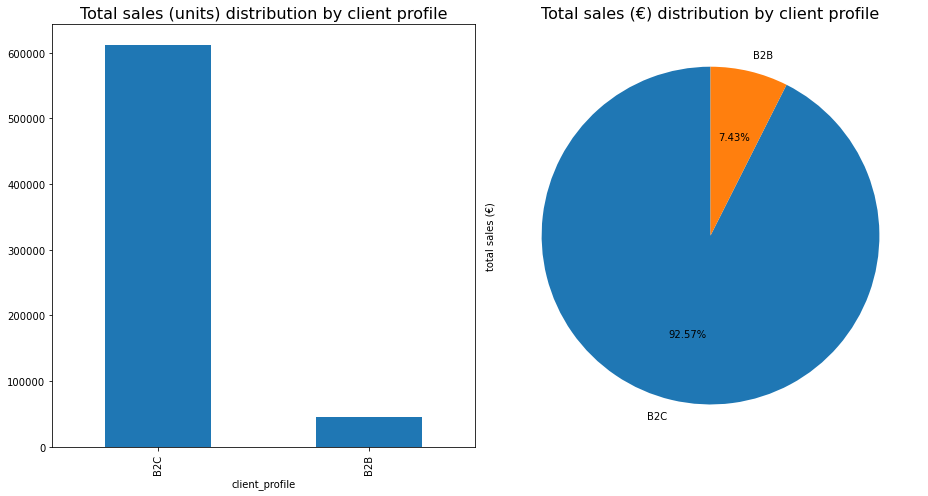

In [17]:
client_profile = profile.groupby("client_profile").sum()#group by client profile

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("Total sales (units) distribution by client profile", fontsize=16)
client_profile["purchase frequency"].plot(kind="bar")

plt.subplot(122)
plt.title("Total sales (€) distribution by client profile", fontsize=16)
client_profile["total sales (€)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.tight_layout()
plt.savefig("Part2.Total sales distribution by client profile.png", bbox_inches='tight')
plt.show()

In [18]:
B2C = profile.loc[profile["client_profile"]=="B2C"]#new B2C dataframe
B2B = profile.loc[profile["client_profile"]=='B2B']#new B2B dataframe
print("B2B customers represent 7% of total sales for only", round(B2B["client_profile"].count()/lapage_df["client_id"].nunique()*100,2), "% of total customers")

B2B customers represent 7% of total sales for only 0.05 % of total customers


<div class="alert-success">
    <u>Notice</u> :
    <i><li> The B2B customers represent 7% of total sales for only 0,05% of total customers</li>
    <i><li> Here we add the client_profile information into the profile dataframe but it is useless to add this information into the online store database (lapage_df) because we have no strategic interest to study B2B customers by their age and sexe in opposite with B2C customers</li>
    <i><li> We can analyse B2C customers profile excluding the four B2B customers</li>
</i></div>

- Relative sales concentration (Lorenz curve analysis on B2C customers) :

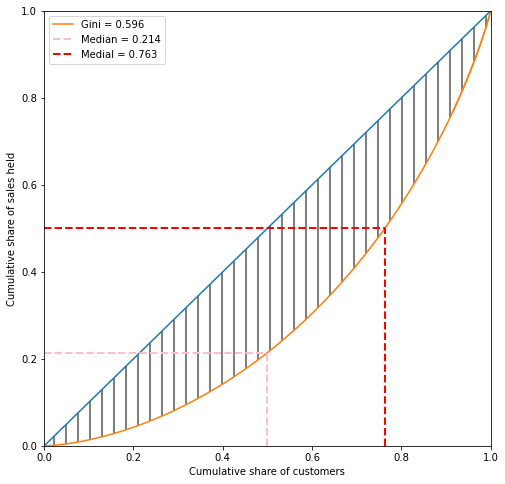

In [19]:
n = len(B2C['total sales (€)'])#total sales number

#lorenz curve calculation
lorenz = np.cumsum(np.sort(B2C['total sales (€)'].values)) / B2C['total sales (€)'].values.sum()
xaxis = np.linspace(0,1,len(lorenz)) 

s = (lorenz.sum()-lorenz[-1]/2-lorenz[0]/2)/n #area under the lorenz curve
s1 = 0.5-s #area between the equidistribution line and lorenz curve
Gini = 2*s #gini coefficient calculation

plt.figure(figsize=(8,8))

plt.xlim(0,1)
plt.xlabel("Cumulative share of customers")

plt.ylim(0,1)
plt.ylabel("Cumulative share of sales held")

plt.plot([0,1], [0,1])#equidistribution line
plt.fill_between(xaxis, xaxis, lorenz,alpha=0.001, hatch="|",)
plt.plot(xaxis, lorenz, drawstyle='steps-post', label='Gini = %.3f'%Gini)#lorenz curve

Me = lorenz[int(len(lorenz) / 2)]
plt.plot([0.5, 0.5], [0, Me], color='pink', linestyle='--', linewidth=2, label='Median = %.3f'%Me)
plt.plot([0, 0.5], [Me, Me], color='pink', linestyle='--', linewidth=2)

Ml = len(lorenz[lorenz<= 0.5]) / len(lorenz)
plt.plot([0, Ml], [0.5, 0.5], color='red', linestyle='--', linewidth=2, label='Medial = %.3f'%Ml)
plt.plot([Ml, Ml], [0, 0.5], color='red', linestyle='--', linewidth=2)

plt.legend()
plt.savefig("Part2.Relative sales concentration (Lorenz curve analysis on B2C customers).png", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><li> The fisrt half of B2C customers hold 21% of sales, and so the other half hold 79% of sales</li>
    <i><li> Furthermore, the fisrt half of sales is held by 76% of customers, and so the other half is held by 24% of customers</li>
    <i><li> The concentration of sales is quite unequal between the customers</li>
</i></div>

- Population pyramid (on B2C customers) :

In [20]:
lapage_df_b2c = lapage_df.copy()#new lapage b2c dataframe
lapage_df_b2c.shape

(657726, 14)

In [21]:
#index each B2B customers and delete those rows indexed from the database
indexNames = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_1609'].index
lapage_df_b2c.drop(indexNames, inplace=True)
indexNames1 = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_4958'].index
lapage_df_b2c.drop(indexNames1, inplace=True)
indexNames2 = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_6714'].index
lapage_df_b2c.drop(indexNames2, inplace=True)
indexNames3 = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_3454'].index
lapage_df_b2c.drop(indexNames3, inplace=True)
lapage_df_b2c.shape

(612626, 14)

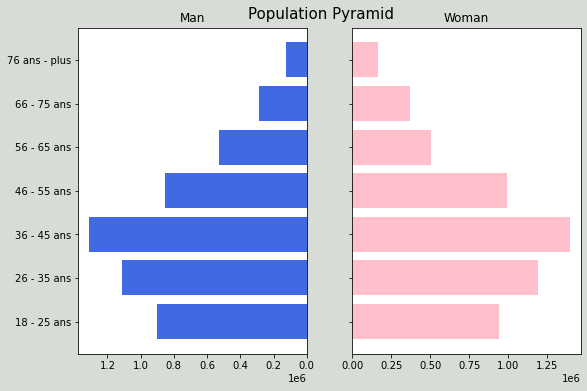

In [22]:
lapage_age_sex = lapage_df_b2c.groupby(["age_groups", "sex"]).agg({"id_prod":"count","price":"sum"})#group by age groups and sex
lapage_age_sex.to_csv("lapage_age_sex.csv", sep=";")
lapage_age_sex = pd.read_csv('lapage_age_sex.csv', sep=';')

woman = lapage_age_sex[lapage_age_sex["sex"]=="f"].copy()#female cumstomer dataframe
woman.rename(columns={"id_prod":"woman_numer"}, inplace=True)

man = lapage_age_sex[lapage_age_sex["sex"]=="m"].copy()#male customer dataframe
man.rename(columns={"id_prod":"man_number"}, inplace=True)

pyramid = pd.merge(man, woman, on="age_groups")#male and female customer dataframes merging
pyramid.drop(columns=["sex_x","sex_y"], inplace=True)
pyramid.rename(columns={"price_x":"man_total_sales", "price_y":"woman_total_sales"}, inplace=True)
pyramid["total_sales"] = round(pyramid["man_total_sales"] + pyramid["woman_total_sales"],2)

y = pyramid["age_groups"]#pyramid axises
x_man = pyramid["man_total_sales"]
x_woman = pyramid["woman_total_sales"]

fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(9, 6))
fig.patch.set_facecolor('xkcd:light grey')#background color
plt.figtext(.5,.9,"Population Pyramid", fontsize=15, ha='center')#plot title

#adjust grid parameters and specify labels for y-axis
axes[0].barh(y, x_man, align='center', color='royalblue')
axes[0].set(title="Man")
axes[1].barh(y, x_woman, align='center', color='pink')
axes[1].set(title="Woman")

axes[0].invert_xaxis()#invert
plt.savefig("Part2.Population pyramid.png", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><li> The sales repartition is the same regardless of the client's gender with a slightly higher consumption by women</li>
    <i><li> It initially grows and reaches its peak in the 36-45 age group, and it then decreases with age</li>
</i></div>

<a id='another_cell_i'></a>

#### b. Top/flop of number of sales

- New dataframe groupby products with new column "number of sales" :

In [23]:
lapage_df_prod = lapage_df.copy()
lapage_df_prod = lapage_df_prod.assign(number_of_sales=1)
lapage_df_prod = lapage_df_prod.groupby(["id_prod","categ","price"]).agg({"number_of_sales":"sum"}).reset_index()
lapage_df_prod["total sales (€)"] = lapage_df_prod["price"] * lapage_df_prod["number_of_sales"]
lapage_df_prod

,id_prod,categ,price,number_of_sales,total sales (€)
0,0_0,0,3.75,1194,4477.50
1,0_1,0,10.99,469,5154.31
2,0_10,0,17.95,18,323.10
3,0_100,0,20.60,3,61.80
4,0_1000,0,6.84,408,2790.72
...,...,...,...,...,...
3259,2_95,2,98.99,4,395.96
3260,2_96,2,47.91,581,27835.71
3261,2_97,2,160.99,13,2092.87
3262,2_98,2,149.74,1,149.74


- Top references :

In [24]:
top_ref = lapage_df_prod[(lapage_df_prod["number_of_sales"] >= 1000)]
top_ref.sort_values(by=["number_of_sales"], ascending=False)
print(len(top_ref),"references have been sold more than 1000 times the last two years on the online bookstore :")
top_ref

124 references have been sold more than 1000 times the last two years on the online bookstore :


,id_prod,categ,price,number_of_sales,total sales (€)
0,0_0,0,3.75,1194,4477.50
394,0_1358,0,16.49,1052,17347.48
403,0_1366,0,16.65,1031,17166.15
446,0_1405,0,4.99,1077,5374.23
448,0_1407,0,13.99,1045,14619.55
...,...,...,...,...,...
2713,1_480,1,19.08,1562,29802.96
2716,1_483,1,15.99,1377,22018.23
2721,1_488,1,12.19,1503,18321.57
2727,1_493,1,10.99,1584,17408.16


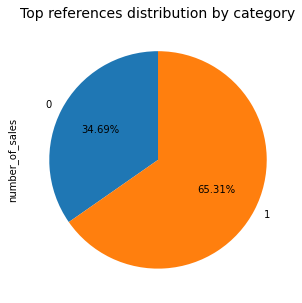

In [25]:
#top references group by category
top_ref_categ = top_ref.groupby("categ").sum()

plt.figure(figsize=(9,5))
plt.title("Top references distribution by category", fontsize=14)
top_ref_categ["number_of_sales"].plot(kind="pie", autopct='%1.2f%%', startangle=90)
plt.savefig("Part2.Top references distribution by category.png", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><li> 124 references have been sold more than 1000 times the last two years on the online bookstore</li>
    <i><li> There is no top references in the category number 2 (the most expensive one)</li>
    <i><li> 2/3 of the top references are in the category number 1 and 1/3 in the category number 0</li>
</i></div>

- Flop references :

In [26]:
flop_ref = lapage_df_prod[(lapage_df_prod["number_of_sales"] < 2)]
flop_ref.sort_values(by=["number_of_sales"], ascending=True)
print(len(flop_ref),"references have been sold less than 2 times the last two years on the online bookstore :")
flop_ref

20 references have been sold less than 2 times the last two years on the online bookstore :


,id_prod,categ,price,number_of_sales,total sales (€)
166,0_1151,0,2.99,1,2.99
313,0_1284,0,1.38,1,1.38
548,0_1498,0,2.48,1,2.48
588,0_1533,0,27.99,1,27.99
594,0_1539,0,0.99,1,0.99
656,0_1595,0,2.99,1,2.99
664,0_1601,0,1.99,1,1.99
697,0_1633,0,24.99,1,24.99
751,0_1683,0,2.99,1,2.99
801,0_1728,0,2.27,1,2.27


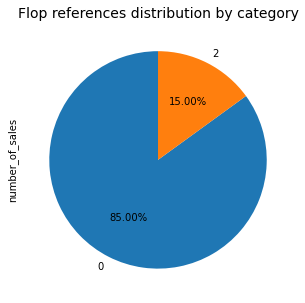

In [27]:
#flop references group by category
flop_ref_categ = flop_ref.groupby("categ").sum()

plt.figure(figsize=(9,5))
plt.title("Flop references distribution by category", fontsize=14)
flop_ref_categ["number_of_sales"].plot(kind="pie", autopct='%1.2f%%', startangle=90)
plt.savefig("Part2.Flop references distribution by category.png", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><li> 20 references have been sold less than 2 times the last two years on the online bookstore</li>
    <i><li> There is no flop reference in the category number 1</li>
    <i><li> The flop references are mostly in the category number 0 (the cheapest one with 85%), and 15% in the category number 2</li>
</i></div>

<a id='another_cell_j'></a>

### Conclusion (part 2) 

<div class="alert-success">
<b>Sales by category of products :</b>
<br><li>The category number 0 is the cheapest category of products and quite popular, as the category number 1 which is in the middle of prices and sales</br></li>
<li>The category number 2 is the most expensive and therefore the least sold</li>

<b>Age group customers distribution :</b>
<li>The 36-45 age group is the one that buy the most products online and the one that has the largest percentage of purchases during the two last years</li>
<li>Category 0 : most of clients have more than 30 years-old in this "cheap products" category</li>
<li>Category 1 : this category in the middle of prices and sales seems to interest proportionally all age groups</li>
<li>Category 2 : most of clients have less than 25 years-old in this "expensive products" category</li>

<b>Sales evolution and data recorded :</b>
<li>Online sales reached a peak of over 20 000 € per day in February 2022</li>
<li>No sales have been recorded from October 02 to 27, 2021 on category 1, so we had to delete the month of October 2021 in the database to avoid biased averages</li>
<li>The total sales evolution is rather stable over time for each category of products</li>

<b>Customer profile :</b>
<li>There are 4 B2B customers who represent 7% of total sales for only 0,05% of total customers</li>
<li>The fisrt half of B2C customers hold 21% of sales, and so the other half hold 79% of sales : the concentration of sales is quite unequal between the customers</li>
<li>The sales repartition is the same regardless of the client's gender with a slightly higher consumption by women : it initially grows and reaches its peak in the 36-45 age group, and it then decreases with age</li>

<b>Top and Flop references :</b>
<li>124 references have been sold more than 1000 times the last two years on the online bookstore : no one is on the category number 2, 2/3 are in the category number 1 and 1/3 ine the category number 0</li>
<li>20 references have been sold less than 2 times the last two years on the online bookstore : no one ine the category number 1, mostly in the category number 0 (the cheapest one) and a few in the category number 2 (the expensive one)</li>
</div>

In [28]:
#the customer behavior analysis Part 3 is realised only on the b2c customers
lapage_df_b2c.drop('Unnamed: 0', 1, inplace=True)#we delete the first empty column of the dataframe
lapage_df_b2c.to_csv("export_lapage_df_b2c.csv", sep=";")#we export the b2c dataframe to import it on Part 3